<a href="https://colab.research.google.com/github/yuliyaosipava/ROC-curve/blob/main/ROC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Задания_1_2.xlsx to Задания_1_2.xlsx


In [ ]:
# Загрузка данных
training_data = pd.read_excel('Задания_1_2.xlsx', sheet_name='Training')
validate_data = pd.read_excel('Задания_1_2.xlsx', sheet_name='Validate')

In [ ]:
# Обработка пропущенных значений
training_data.fillna(training_data.mean(), inplace=True)
validate_data.fillna(validate_data.mean(), inplace=True)

Accuracy: 0.7297


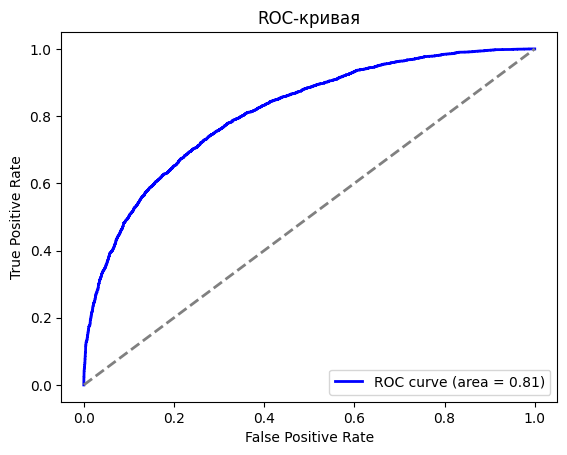

Три наиболее важных предиктора:
P23    0.227656
P16    0.170772
P10    0.127567
dtype: float64


In [ ]:
# Разделение данных на признаки и целевую переменную
X_train = training_data.drop(columns=['ID', 'Target'])
y_train = training_data['Target']

X_validate = validate_data.drop(columns=['ID'])

# Обучение модели градиентного бустинга
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

X_train, X_validate = X_train.align(X_validate, join='inner', axis=1)





# Прогнозирование
y_pred = model.predict(X_validate)
y_pred_proba = model.predict_proba(X_validate)[:,1]

# Оценка точности на обучающей выборке
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy}')

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:,1])
roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# Важность предикторов
feature_importance = model.feature_importances_
important_features = pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False)

print('Три наиболее важных предиктора:')
print(important_features.head(3))
